# OCR with pytesseract

In [1]:
import os

from PIL import Image
import pytesseract

In [2]:
im = Image.open('images/mediaindo_20190219-01/image_4.jpg')
print(im.mode, im.size, im.format)

RGB (1709, 984) JPEG


In [3]:
gray_im = im.convert('L')

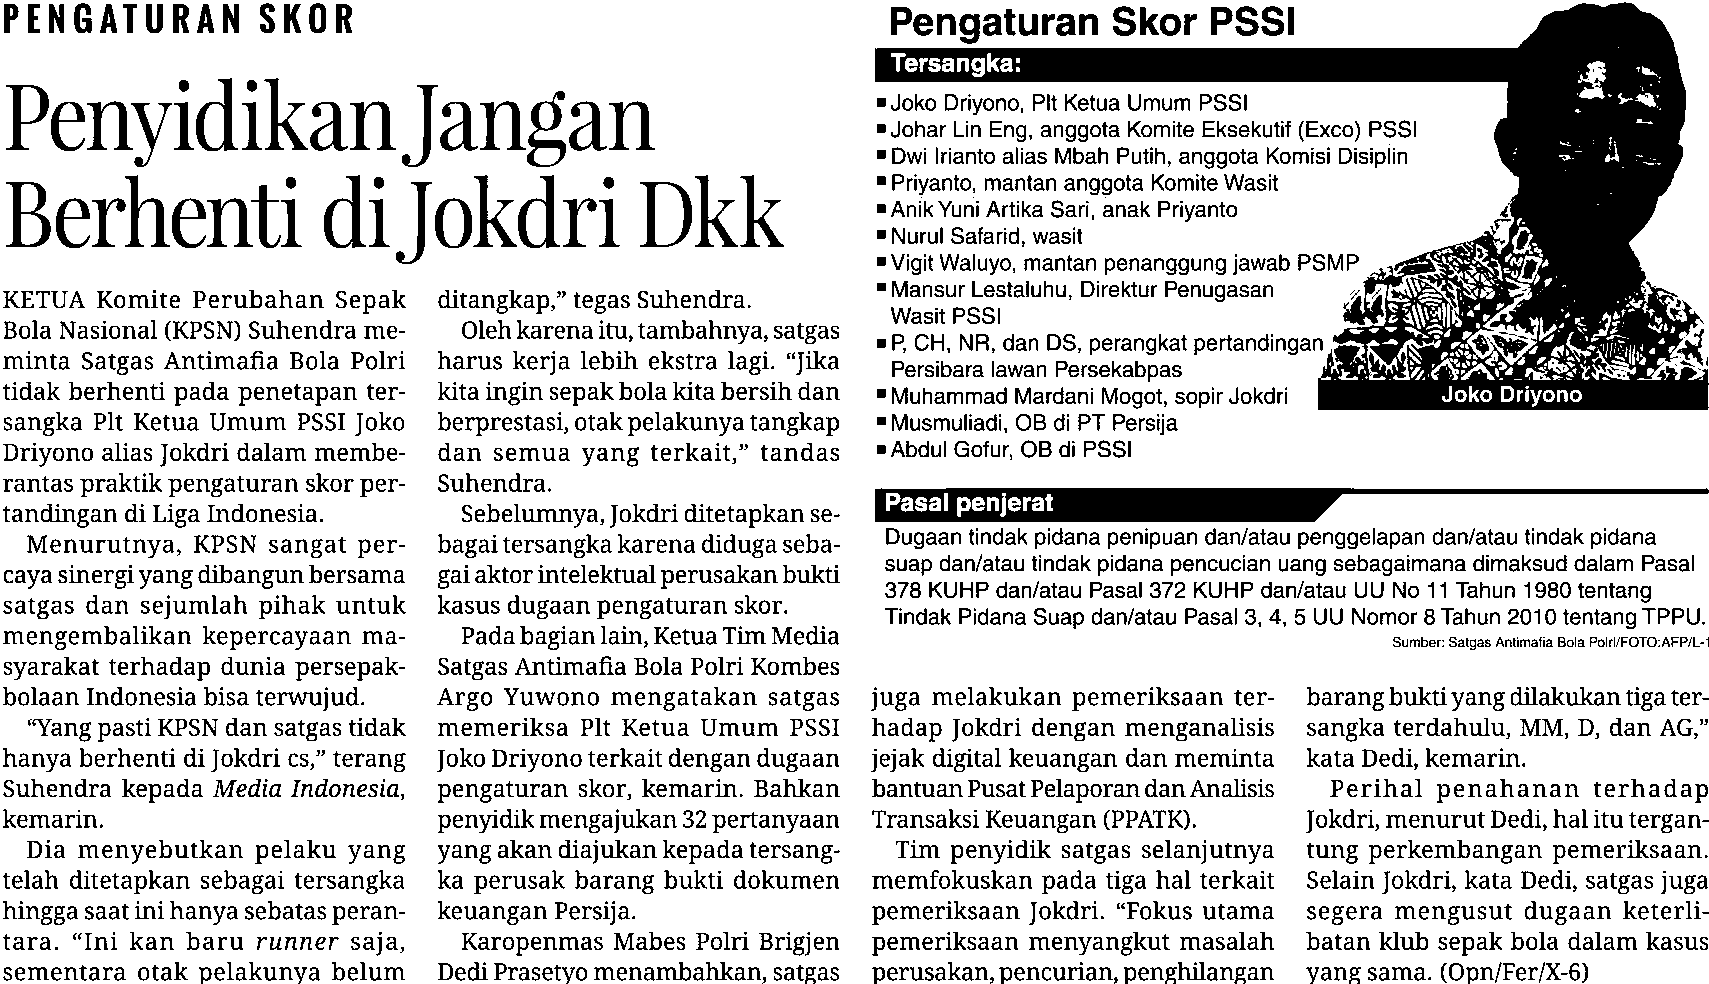

In [4]:
blackwhite_im = gray_im.point(lambda x: 0 if x < 170 else 255)
blackwhite_im

In [34]:
img_string = pytesseract.image_to_string(blackwhite_im, lang='ind')
with open('image_4.txt', 'w') as f:
    f.write(img_string)

In [40]:
for dirpath, dirname, files in os.walk('images/mediaindo_20190219-01/'):
    print(dirpath, dirname, files)

images/mediaindo_20190219-01/ [] ['image_15.jpg', 'image_14.jpg', 'image_16.jpg', 'image_17.jpg', 'image_13.jpg', 'image_12.jpg', 'image_10.jpg', 'image_11.jpg', 'image_8.jpg', 'image_9.jpg', 'image_2.jpg', 'image_3.jpg', 'image_1.jpg', 'image_4.jpg', 'image_5.jpg', 'image_7.jpg', 'image_6.jpg', 'bounding_box.png']


In [50]:
def article_ocr(datapath, lang='ind'):
    """Extracts text in article image to string.
    
    Args:
        datapath (str): Directory path where image data exist.
            It expects the data is direct child of `datapath`.
        lang (str): Language used for ocr engine. Default is `ind`
            for Indonesian.
    """
    for dirpath, _, files in os.walk(datapath):
        for file in files:
            if file.startswith('image'):
                prefix = file.split('.')[0]
                im = Image.open(os.path.join(dirpath, file))
#                 bw_im = im.convert('L').point(lambda x: 0 if x < 170 else 255, '1')
                im_string = pytesseract.image_to_string(im, lang=lang)
                
                # save to txt
                with open(os.path.join(dirpath, prefix+'.txt'), 'w') as f:
                    f.write(im_string)

In [51]:
article_ocr('images/mediaindo_20190219-01')